In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def print_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest', aspect='auto')

In [3]:
def FLD(image):
    # Create default Fast Line Detector class
    fld = cv2.ximgproc.createFastLineDetector()
    # Get line vectors from the image
    lines = fld.detect(image)
    # Draw lines on the image
    line_on_image = fld.drawSegments(image, lines)
    return line_on_image

(480, 640, 3)
(480, 640)
(480, 640, 3)
0.03330442


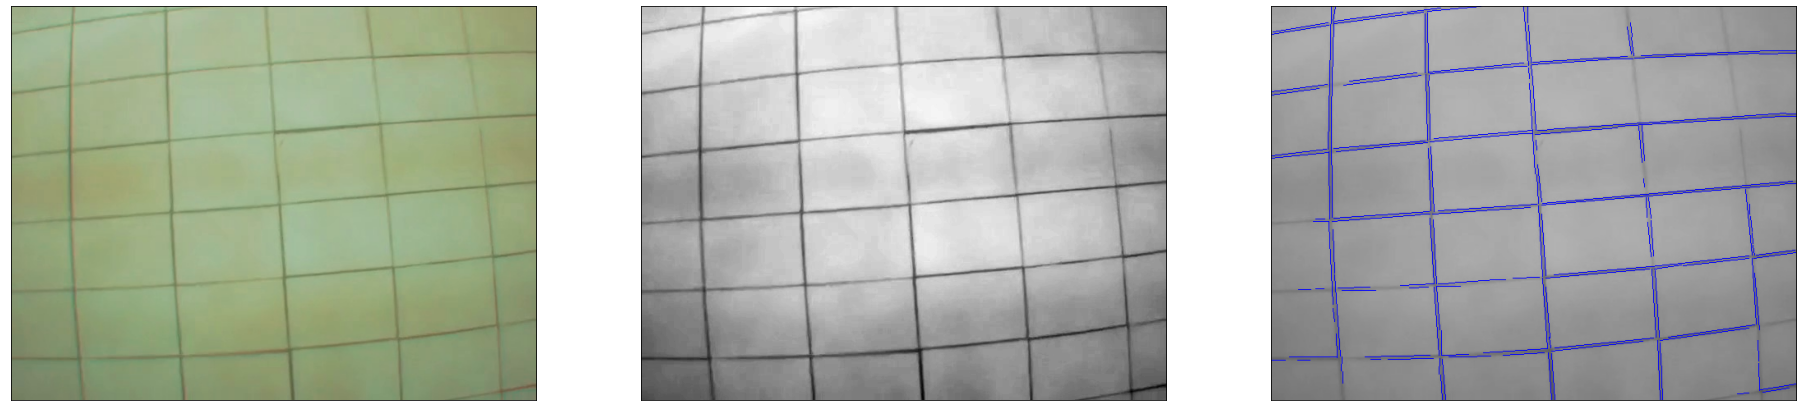

In [28]:
IMAGE_PATH = '../images/frame_0.jpg'

e1 = cv2.getTickCount()

img = cv2.imread(IMAGE_PATH)
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
img_with_lines = FLD(gray)
print(img_with_lines.shape)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

images = [img, gray, img_with_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

In [6]:
def rotate(image, angle):
    rows,cols = image.shape
    # cols-1 and rows-1 are the coordinate limits.
    M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

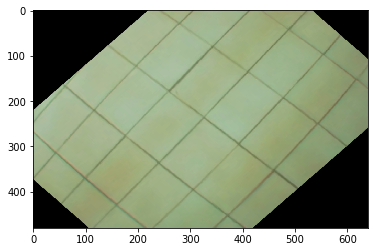

In [7]:
rotated = rotate(gray, 45)
print_image(rotated)

In [44]:
def adaptive_threshold(image):
    e1 = cv2.getTickCount()
    th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    e2 = cv2.getTickCount()
    print('adaptive_threshold time: ', (e2 - e1)/ cv2.getTickFrequency())
    return th
    

In [40]:
def otsu_threshold(image):
    ret3,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return otsu

0.06774233


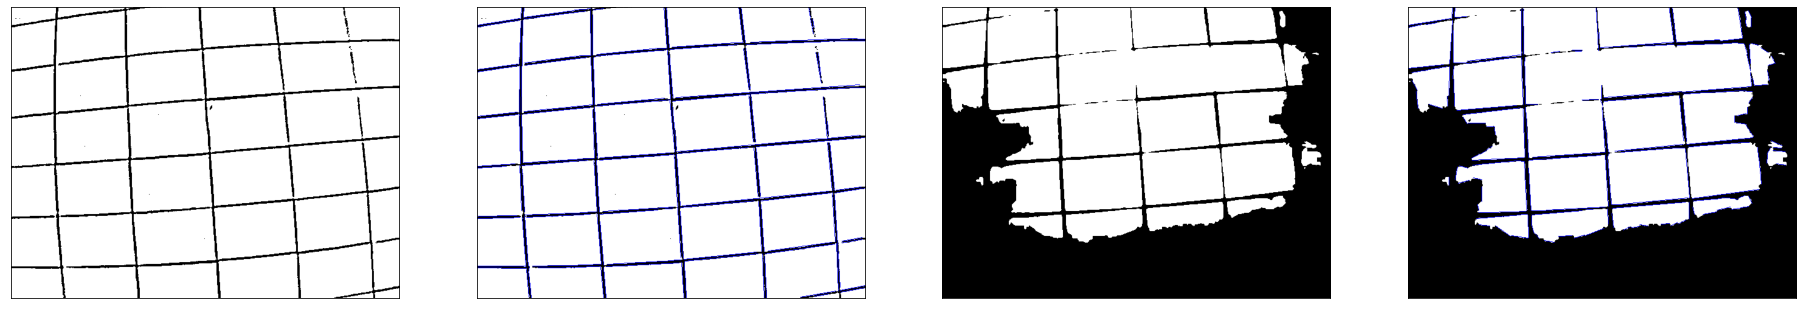

In [35]:
e1 = cv2.getTickCount()

th, otsu = threshold(gray)
th_lines = FLD(th)
otsu_lines = FLD(otsu)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

images = [th, th_lines, otsu, otsu_lines]

fig = plt.figure(figsize=(32,24))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')


In [43]:
def gauss_blur(image):
    e1 = cv2.getTickCount()
    blur = cv2.GaussianBlur(image,(5,5),0)
    e2 = cv2.getTickCount()
    print('gauss_blur time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

In [42]:
def bilaterial_filter(image):
    e1 = cv2.getTickCount()
    blur = cv2.bilateralFilter(image,9,75,75)
    e2 = cv2.getTickCount()
    print('bilaterial filter time: ', (e2 - e1)/ cv2.getTickFrequency())
    return blur

gauss_blur time:  0.00034031
adaptive_threshold time:  0.004159144


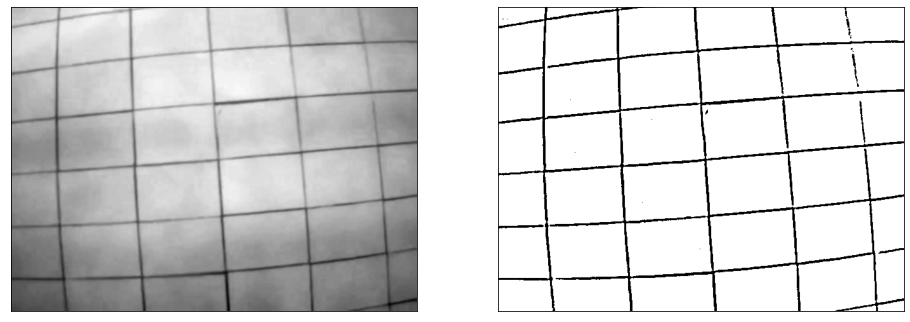

In [57]:
blur = gauss_blur(gray)
th = adaptive_threshold(blur)


images = [blur, th]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [65]:
def opening_joints(image):
    kernel = np.ones((15,15),np.uint8)
    e1 = cv2.getTickCount()
    opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    e2 = cv2.getTickCount()
    print('opening_joints time: ', (e2 - e1)/ cv2.getTickFrequency())
    return opening

opening_joints time:  0.00195505


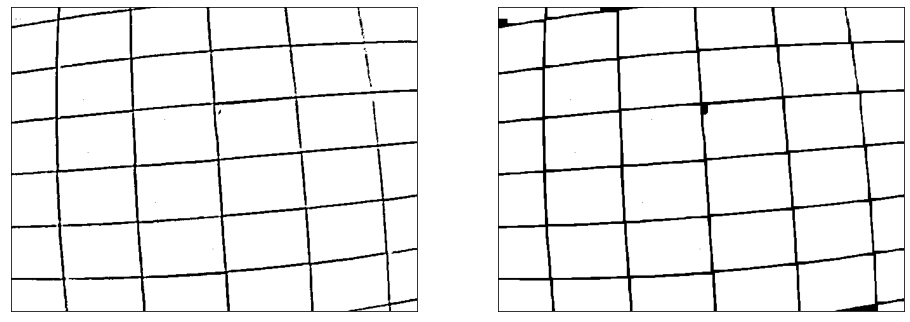

In [66]:
opening = opening_joints(th)
images = [th, opening]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

In [69]:
def canny_detector(image):
    e1 = cv2.getTickCount()
    edges = cv2.Canny(image,50,150,apertureSize = 3)
    e2 = cv2.getTickCount()
    print('canny_detector time: ', (e2 - e1)/ cv2.getTickFrequency())
    return edges

In [72]:
def HLD(image):
    e1 = cv2.getTickCount()
    lines = cv2.HoughLines(image,1,np.pi/180,200)
    e2 = cv2.getTickCount()
    print('HLD time: ', (e2 - e1)/ cv2.getTickFrequency())

    return lines

In [81]:
canny = canny_detector(opening)
#lines = HLD(canny)
print(HLD(canny))
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

images = [th, opening, canny, img]

fig = plt.figure(figsize=(16,12))

for i in range(len(images)):
    fig.add_subplot(1, len(images), i + 1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(images[i],'gray')

canny_detector time:  0.014691186
HLD time:  0.015599973
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TypeError: 'numpy.uint8' object is not iterable